In [6]:
# imports
import requests
import json
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns


Build a regression model.

In [7]:
# get the data from bike_stations_FS_Yelp.csv
bike_stations_FS_Yelp = pd.read_csv('..\\data\\bike_stations_FS_Yelp.csv')
bike_stations_FS_Yelp.columns

Index(['station_id', 'name', 'lon', 'lat', 'address', 'num_bikes_available',
       'num_bikes_disabled', 'last_reported', 'distance_to_Hamilton_downtown',
       'FS_sum_distance', 'FS_POI_count', 'FS_avg_distance',
       'Yelp_sum_distance', 'Yelp_POI_count', 'Yelp_avg_distance'],
      dtype='object')

In [8]:
#build a  linear regression model to predict the number of bikes available at a given station
# we will use the following features:
#  distance from the station to hamilton downtown
#  yelp average distance
#  FS average distance
#  bikes available
#  Yelp_POI_count
#  FS_POI_count

# we will use the following target:
#  number of bikes available

# we will use the following model:
#  Linear Regression

# Create a new dataframe with the features and the target
bike_stations_FS_Yelp_model = bike_stations_FS_Yelp[['Yelp_POI_count','FS_POI_count', 'distance_to_Hamilton_downtown', 'Yelp_avg_distance', 'FS_avg_distance', 'num_bikes_available']]
bike_stations_FS_Yelp_model.head()




,Yelp_POI_count,FS_POI_count,distance_to_Hamilton_downtown,Yelp_avg_distance,FS_avg_distance,num_bikes_available
0,20.0,10.0,5250.0,571.610181,451.3,27
1,20.0,10.0,4940.0,716.722005,588.3,16
2,12.0,10.0,2610.0,1083.937780,499.6,13
3,20.0,10.0,1510.0,881.900552,527.4,13
4,20.0,10.0,2860.0,841.971628,468.5,12


d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

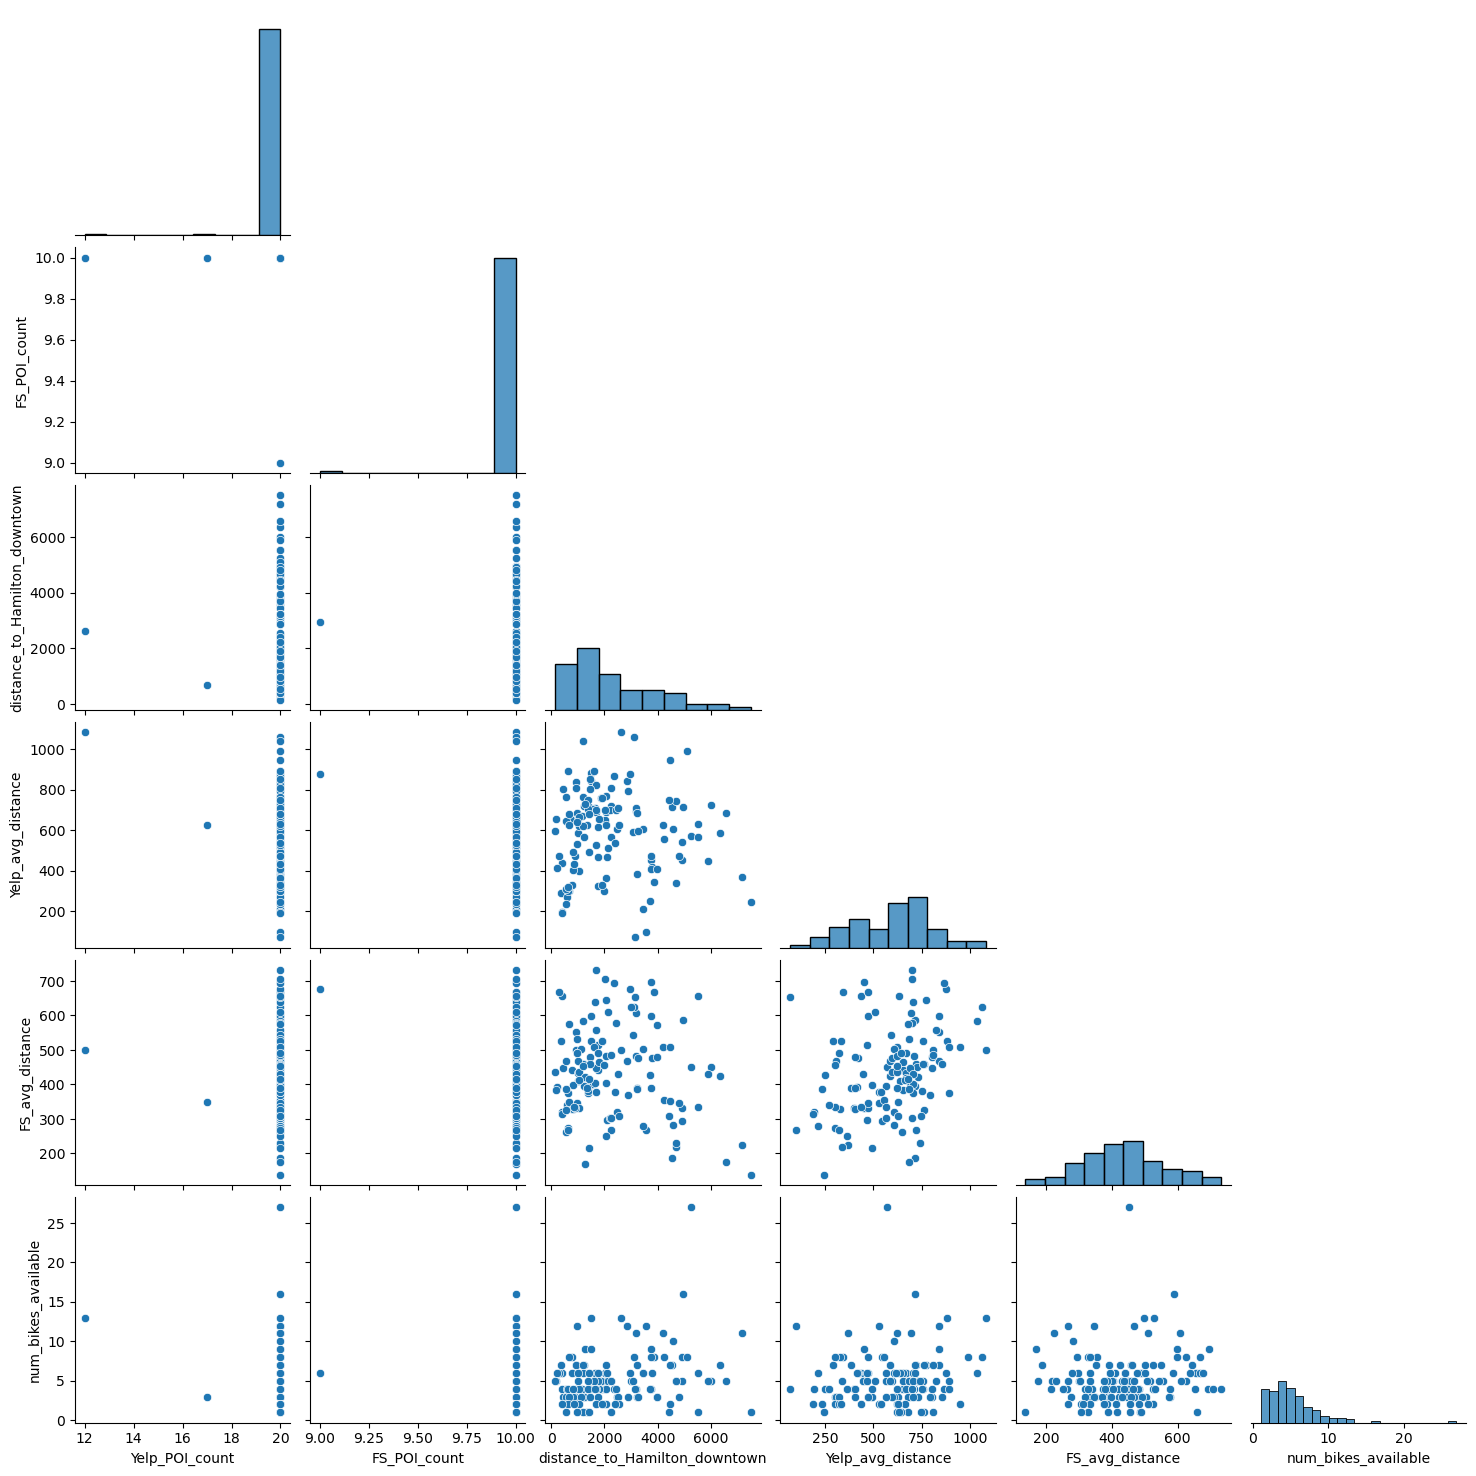

In [9]:
# calculate the correlation matrix
corr = bike_stations_FS_Yelp_model.corr()

# create a pairplot
sns.pairplot(bike_stations_FS_Yelp_model,corner=True)


d:\Anaconda\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

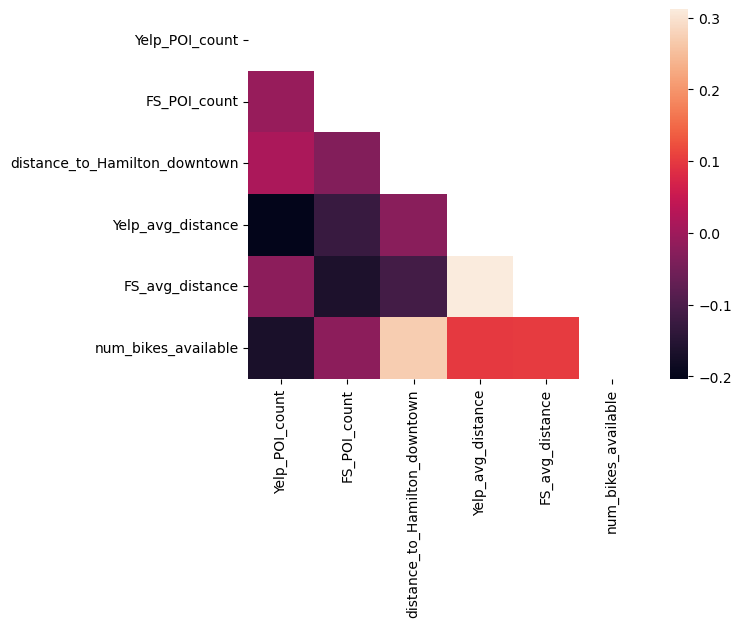

In [10]:
# create a heatmap
sns.heatmap(corr, annot=True, mask=np.triu(np.ones_like(bike_stations_FS_Yelp_model.corr(), dtype=bool)))

Provide model output and an interpretation of the results. 

In [11]:
# Replace NaN values in the dataframe with 0
bike_stations_FS_Yelp_model = bike_stations_FS_Yelp_model.fillna(0)


In [12]:
# we'll use a backward elimination approach to select the features
# we'll use the p-value to select the features
# we'll use the OLS method to fit the model
# we'll use the statsmodels library to fit the model

y = bike_stations_FS_Yelp_model['num_bikes_available']
X = bike_stations_FS_Yelp_model.drop(columns=['num_bikes_available'])


# add a constant to the model
X = sm.add_constant(X)

# fit the model
model = sm.OLS(y, X)
results = model.fit()

In [13]:
# print the summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     num_bikes_available   R-squared:                       0.098
Model:                             OLS   Adj. R-squared:                  0.064
Method:                  Least Squares   F-statistic:                     2.878
Date:                 Sun, 10 Mar 2024   Prob (F-statistic):             0.0169
Time:                         15:39:21   Log-Likelihood:                -355.23
No. Observations:                  138   AIC:                             722.5
Df Residuals:                      132   BIC:                             740.0
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             4.8500      2.766      1.754      0.082      -0.621      10.321
Yelp_POI_count                   -0.0537      0.078     -0.691      0.491      -0.207       0.100
FS_POI_count                     -0.1985      0.257     -0.773      0.441      -0.707       0.310
distance_to_Hamilton_downtown     0.0006      0.000      3.359      0.001       0.000       0.001
Yelp_avg_distance                 0.0014      0.001      0.977      0.330      -0.001       0.004
FS_avg_distance                   0.0028      0.002      1.215      0.227      -0.002       0.007
==============================================================================
Omnibus:                       92.720   Durbin-Watson:                   0.300
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              792.604
Skew:                           2.241   Prob(JB):                    7.73e-173
Kurtosis:                      13.851   Cond. No.                     2.92e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.92e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
#remove the Yelp_POI_count feature
X = X.drop(columns=['Yelp_POI_count'])

# fit the model
model = sm.OLS(y, X)
results = model.fit()

# print the summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     num_bikes_available   R-squared:                       0.095
Model:                             OLS   Adj. R-squared:                  0.068
Method:                  Least Squares   F-statistic:                     3.491
Date:                 Sun, 10 Mar 2024   Prob (F-statistic):            0.00957
Time:                         15:39:21   Log-Likelihood:                -355.48
No. Observations:                  138   AIC:                             721.0
Df Residuals:                      133   BIC:                             735.6
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             4.1819      2.586      1.617      0.108      -0.933       9.297
FS_POI_count                     -0.2169      0.255     -0.851      0.396      -0.721       0.287
distance_to_Hamilton_downtown     0.0006      0.000      3.383      0.001       0.000       0.001
Yelp_avg_distance                 0.0009      0.001      0.729      0.467      -0.002       0.003
FS_avg_distance                   0.0031      0.002      1.343      0.182      -0.001       0.008
==============================================================================
Omnibus:                       92.073   Durbin-Watson:                   0.290
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              769.088
Skew:                           2.231   Prob(JB):                    9.88e-168
Kurtosis:                      13.670   Cond. No.                     2.74e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
#remove the FS_POI_count feature
X = X.drop(columns=['FS_POI_count'])

# fit the model
model = sm.OLS(y, X)
results = model.fit()

# print the summary
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     num_bikes_available   R-squared:                       0.090
Model:                             OLS   Adj. R-squared:                  0.070
Method:                  Least Squares   F-statistic:                     4.423
Date:                 Sun, 10 Mar 2024   Prob (F-statistic):            0.00534
Time:                         15:39:21   Log-Likelihood:                -355.85
No. Observations:                  138   AIC:                             719.7
Df Residuals:                      134   BIC:                             731.4
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             2.2232      1.177      1.889      0.061      -0.105       4.551
distance_to_Hamilton_downtown     0.0006      0.000      3.433      0.001       0.000       0.001
Yelp_avg_distance                 0.0011      0.001      0.948      0.345      -0.001       0.004
FS_avg_distance                   0.0023      0.002      1.096      0.275      -0.002       0.006
==============================================================================
Omnibus:                       90.196   Durbin-Watson:                   0.283
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              734.518
Skew:                           2.180   Prob(JB):                    3.17e-160
Kurtosis:                      13.427   Cond. No.                     1.24e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
#remove the Yelp_avg_distance feature
X = X.drop(columns=['Yelp_avg_distance'])

# fit the model
model = sm.OLS(y, X)
results = model.fit()

# print the summary
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     num_bikes_available   R-squared:                       0.084
Model:                             OLS   Adj. R-squared:                  0.070
Method:                  Least Squares   F-statistic:                     6.190
Date:                 Sun, 10 Mar 2024   Prob (F-statistic):            0.00268
Time:                         15:39:21   Log-Likelihood:                -356.31
No. Observations:                  138   AIC:                             718.6
Df Residuals:                      135   BIC:                             727.4
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             2.7326      1.047      2.611      0.010       0.663       4.803
distance_to_Hamilton_downtown     0.0006      0.000      3.421      0.001       0.000       0.001
FS_avg_distance                   0.0026      0.002      1.284      0.201      -0.001       0.007
==============================================================================
Omnibus:                       89.988   Durbin-Watson:                   0.264
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              721.517
Skew:                           2.181   Prob(JB):                    2.11e-157
Kurtosis:                      13.318   Cond. No.                     1.09e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
#remove the FS_avg_distance feature
X = X.drop(columns=['FS_avg_distance'])

# fit the model
model = sm.OLS(y, X)
results = model.fit()

# print the summary
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     num_bikes_available   R-squared:                       0.073
Model:                             OLS   Adj. R-squared:                  0.066
Method:                  Least Squares   F-statistic:                     10.68
Date:                 Sun, 10 Mar 2024   Prob (F-statistic):            0.00137
Time:                         15:39:21   Log-Likelihood:                -357.15
No. Observations:                  138   AIC:                             718.3
Df Residuals:                      136   BIC:                             724.2
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             3.9294      0.478      8.229      0.000       2.985       4.874
distance_to_Hamilton_downtown     0.0005      0.000      3.268      0.001       0.000       0.001
==============================================================================
Omnibus:                       91.001   Durbin-Watson:                   0.230
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              738.546
Skew:                           2.209   Prob(JB):                    4.24e-161
Kurtosis:                      13.437   Cond. No.                     4.93e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

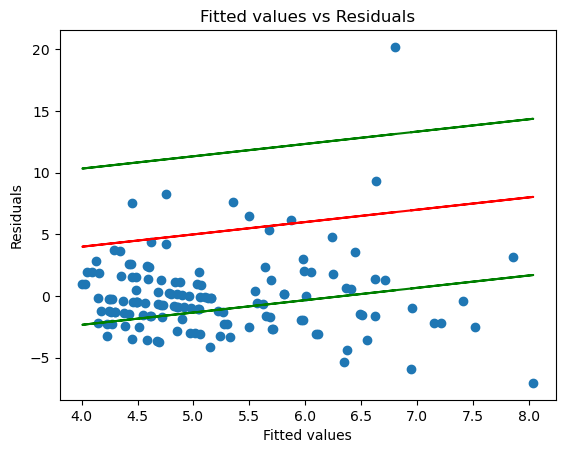

In [18]:
# visualize the results
# create a scatter plot
# add the regression line
# add the confidence interval

# create a scatter plot
plt.scatter(results.fittedvalues, results.resid)
# add labels
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
# add the regression line
plt.plot(results.fittedvalues, results.fittedvalues, color='red')
# add the confidence interval
plt.plot(results.fittedvalues, results.fittedvalues + 1.96 * results.resid.std(), color='green')# 1.96 is the z value for a 95% confidence interval
plt.plot(results.fittedvalues, results.fittedvalues - 1.96 * results.resid.std(), color='green')
# add a title
plt.title('Fitted values vs Residuals')
# show the plot
plt.show()


# Stretch

How can you turn the regression model into a classification model?